# __Problema Monty Hall__

<img src = "http://panamahitek.com/wp-content/uploads/2019/09/maxresdefault.jpg"/>

Supongan que están en un concurso de TV, cuyo presentador se llama Monty Hall. Ahora, Monty le presenta el siguiente juego:

Ante ustedes hay tres puertas, detrás de cada una habrá un auto o una cabra, en total hay dos cabras y un auto, ustedes tendrán que adivinar en qué puerta se encuentra el auto. 

De esta manera, ustedes escogen alguna de las puertas, antes de abrir la puerta seleccionada, el presentador abre una de las dos puertas restantes en la cual hay una cabra (tomen en cuenta que el presentador conoce lo que hay detrás de cada una de las puertas). Ahora se les plantea las siguientes preguntas:

* _¿Qué harían ustedes?_
* _¿Hay alguna diferencia entre cambiar de puerta o permanecer con la elección inicial?_
* _¿Cuál es la probabilidad de ganar el auto en cada uno de los casos?_


Dicho esto, simulemos el problema para así llegar a alguna conclusión y mejorar nuestras probabilidades de ganar un auto...

In [3]:
# Cajas de herramientas
import numpy as np #from numpy import mean
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def DameNumero(mensaje = ""):
    while True:
        try:
            print("\n")
            numero = int(input(mensaje))
            return numero
        except ValueError:
            print("Dato erroneo, por favor, dame un número entero")

In [5]:
class MontyHallPriori():
    
    def __init__(self):
        intentos = 0
        while intentos < 1:
            intentos = DameNumero('¿Cuántas veces quieres intentar?')
        
        self.intentos = intentos
        self.puntaje_promedio = []
        self.contador = [] #Se puede quitar
        self.proba = 0
        self.jugada = "Priori" # Sin cambio
        
    def Simular(self):
        for i in range(1, self.intentos + 1):
            puntajes = []
            
            for _ in range(1, i+1):
                puntajes.append(self.Intento())
                
            self.puntaje_promedio.append(np.mean(puntajes))
            self.contador.append(i)
            
        self.proba = self.puntaje_promedio[-1]
        print(self)
        self.GraficarResultados()
        
        return
    
    def Intento(self):
        real = randint(0,2)
        priori = randint(0,2)
        
        if real == priori:
            return 1
        else:
            return 0
        
    def GraficarResultados(self):
        # Grafica
        sns.set_style("whitegrid")
        sns.set_palette("tab10")
        plt.figure(figsize = (12,8))
        ax = sns.lineplot(x = self.contador, y = self.puntaje_promedio)
        ax.set_title("Monty Hall ("+self.jugada+"): "+str(self.intentos),fontsize = '25')
        ax.set_xlabel('Intentos',fontsize = '20')
        ax.set_ylabel('Probabilidad',fontsize = '20')
        plt.show()
    
    def __str__(self):
        return "\n         Informe        \n**************************\nTipo de jugada: %s \nIntentos: %s \nProbabilidad de ganar: %s \n \
        " %(self.jugada, self.intentos, self.proba)

In [6]:
class MontyHallPosteriori(MontyHallPriori):
    
    def __init__(self):
        intentos = 0
        while intentos < 1:
            intentos = DameNumero('¿Cuántas veces quieres intentar?')
        
        self.intentos = intentos
        self.puntaje_promedio = []
        self.contador = [] #Se puede quitar
        self.proba = 0
        self.jugada = "Posteriori" # Con cambio
        
    def Intento(self):
        real = randint(0,2)
        priori = randint(0,2)
        
        opciones_posteriori = [0,1,2] #list(range(3))
        opciones_posteriori.remove(priori)
        
        if opciones_posteriori[0] == real:
            del opciones_posteriori[1]
        elif opciones_posteriori[1] == real:
            del opciones_posteriori[0]
        else:
            del opciones_posteriori[randint(0,len(opciones_posteriori)-1)]
        
        posteriori = opciones_posteriori[0]
        
        # Puntajes
        if posteriori == real:
            return 1
        else:
            return 0

In [7]:
def Menu():
    # Menu desplegado
    print("     Monty Hall     ")
    print("**************************")
    print("(1) Jugar sin cambio")
    print("(2) Jugar con cambio")
    print("(3) Terminar")
    print("**************************")
    
    # Opciones a elegir
    opciones = [1,2,3] 
    
    # Dar un valor inicial para la elccion del usuario
    eleccion = 0
    # Hacer que la eleccion sea valida
    while eleccion not in opciones:
        eleccion = DameNumero("¿Cómo quieres jugar?")
    
    # Jugar como quiere el usuario
    if eleccion == 1:
        juego = MontyHallPriori()
    elif eleccion == 2:
        juego = MontyHallPosteriori()
    else:
        print("\nGracias por jugar! (•‿•)")
        return
    
    # Simular el juego
    juego.Simular()
    
    # Regresar al Menu
    Menu()

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************


¿Cómo quieres jugar?2


¿Cuántas veces quieres intentar?10

         Informe        
**************************
Tipo de jugada: Posteriori 
Intentos: 10 
Probabilidad de ganar: 0.8 
         


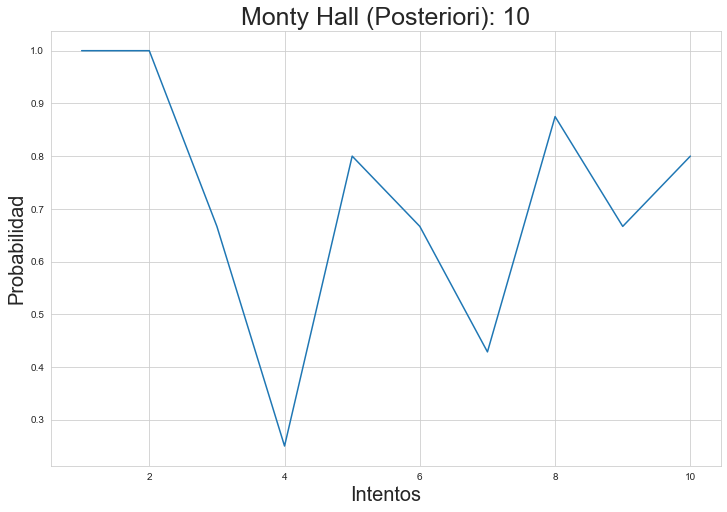

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************


¿Cómo quieres jugar?100


¿Cómo quieres jugar?2


¿Cuántas veces quieres intentar?100

         Informe        
**************************
Tipo de jugada: Posteriori 
Intentos: 100 
Probabilidad de ganar: 0.67 
         


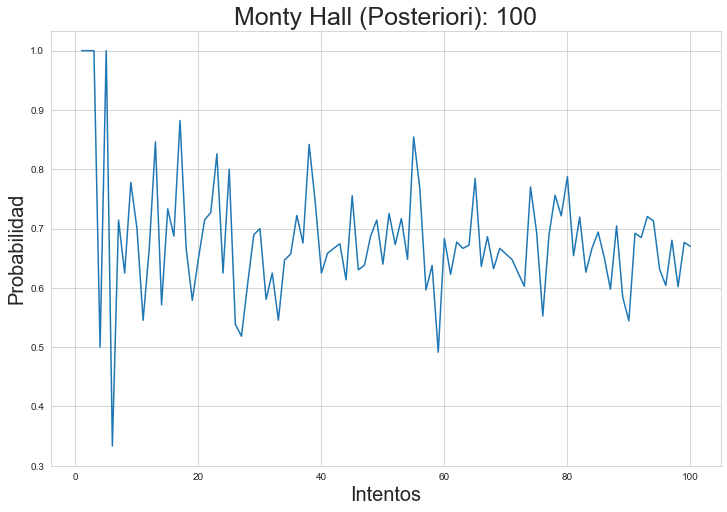

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************


¿Cómo quieres jugar?2


¿Cuántas veces quieres intentar?500

         Informe        
**************************
Tipo de jugada: Posteriori 
Intentos: 500 
Probabilidad de ganar: 0.678 
         


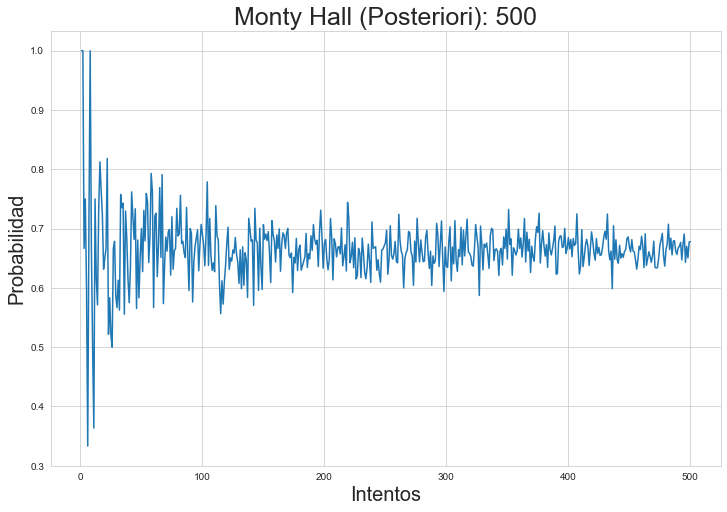

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************


¿Cómo quieres jugar?2


¿Cuántas veces quieres intentar?1000

         Informe        
**************************
Tipo de jugada: Posteriori 
Intentos: 1000 
Probabilidad de ganar: 0.67 
         


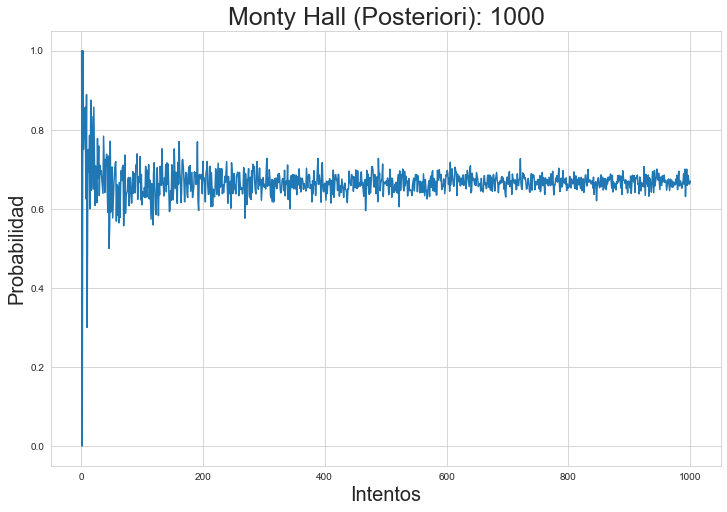

     Monty Hall     
**************************
(1) Jugar sin cambio
(2) Jugar con cambio
(3) Terminar
**************************


¿Cómo quieres jugar?3

Gracias por jugar! (•‿•)


In [9]:
#Vamos a jugar
Menu()

__Así que si ustedes eligieron la estrategia de cambiar de puerta, entonces probablemente ganaron el auto!__

<img src = "https://i.blogs.es/54eeba/ferrari-laferrari-650-01/1366_2000.jpg"/>